# install dependencies 

In [137]:
!pip install tensorflow opencv-python matplotlib

In [138]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.11.3
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.2.1
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8

In [139]:
import tensorflow as tf
import os

# remove dodgy images

In [140]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [141]:
data_dir = 'People'

In [142]:
## os.listdir(os.path.join(data_dir, 'Happy'))  ##loop through every single picture on the Happy folder

In [143]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [144]:
#cleaning up the folders from any dodgy images
for image_class in os.listdir(data_dir):                                 ##collecting all of the folders, which is the Happy and Sad folder
    for image in os.listdir(os.path.join(data_dir, image_class)):        ##collecting all of the images in those folders
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path) #this removes the file from the folder if the requirements are not met
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

# Loading Data

In [145]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [146]:
import numpy as np
from matplotlib import pyplot as plt

In [182]:
data = tf.keras.utils.image_dataset_from_directory('People')

Found 198 files belonging to 2 classes.


In [183]:
data_iterator = data.as_numpy_iterator()

In [184]:
#get another batch from the iterator
batch = data_iterator.next()

In [185]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [186]:
# Class 1 = sad People
# Class 0 = Happy People
batch[0]

array([[[[189.8125    , 187.8125    , 190.8125    ],
         [ 55.3125    ,  51.4375    ,  52.5625    ],
         [ 49.5       ,  44.375     ,  44.8125    ],
         ...,
         [153.125     , 149.125     , 140.125     ],
         [152.9375    , 148.9375    , 139.8125    ],
         [210.4375    , 206.4375    , 195.4375    ]],

        [[191.01416   , 189.01416   , 191.88354   ],
         [ 55.74353   ,  51.86853   ,  52.967407  ],
         [ 50.636353  ,  45.511353  ,  45.76599   ],
         ...,
         [154.47034   , 150.47034   , 141.47034   ],
         [154.59631   , 150.59631   , 141.47131   ],
         [212.04407   , 208.04407   , 197.04407   ]],

        [[193.73193   , 191.73193   , 194.30591   ],
         [ 56.718384  ,  52.843384  ,  53.88318   ],
         [ 53.20642   ,  48.08142   ,  47.922485  ],
         ...,
         [157.51306   , 153.51306   , 144.51306   ],
         [158.34802   , 154.34802   , 145.22302   ],
         [215.67761   , 211.67761   , 200.67761   ]],

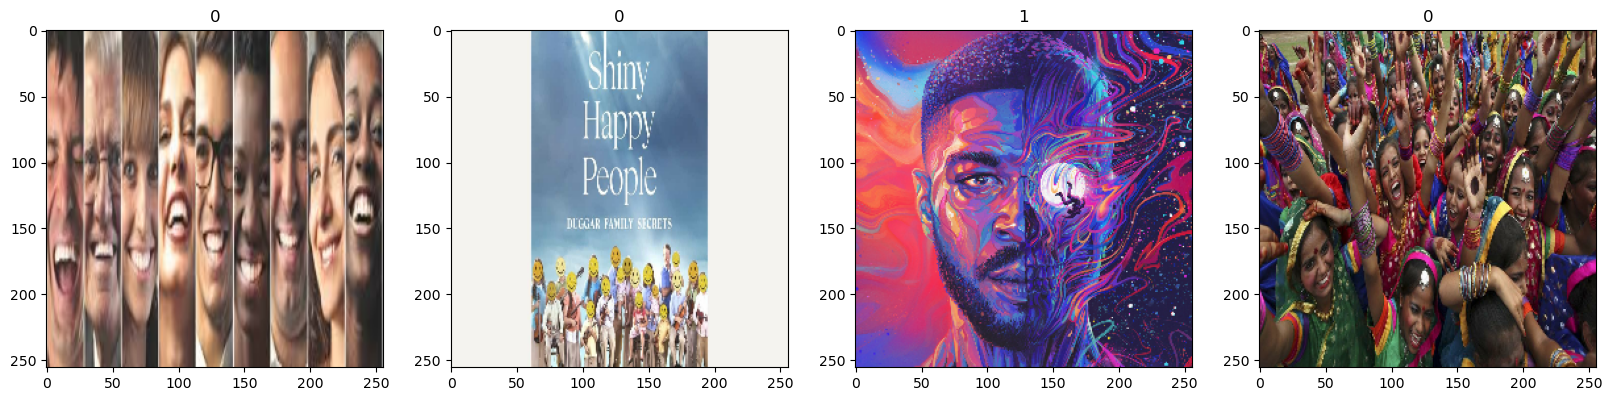

In [187]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))           #using the subplots from matplotlib to be able to plot out 4 images at a time
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Processing Data

## scale data

In [190]:
data = data.map(lambda x,y: (x/255, y))

In [192]:
scaled_iterator = data.as_numpy_iterator()

In [223]:
batch = scaled_iterator.next()

In [197]:
batch[0].max()

1.0

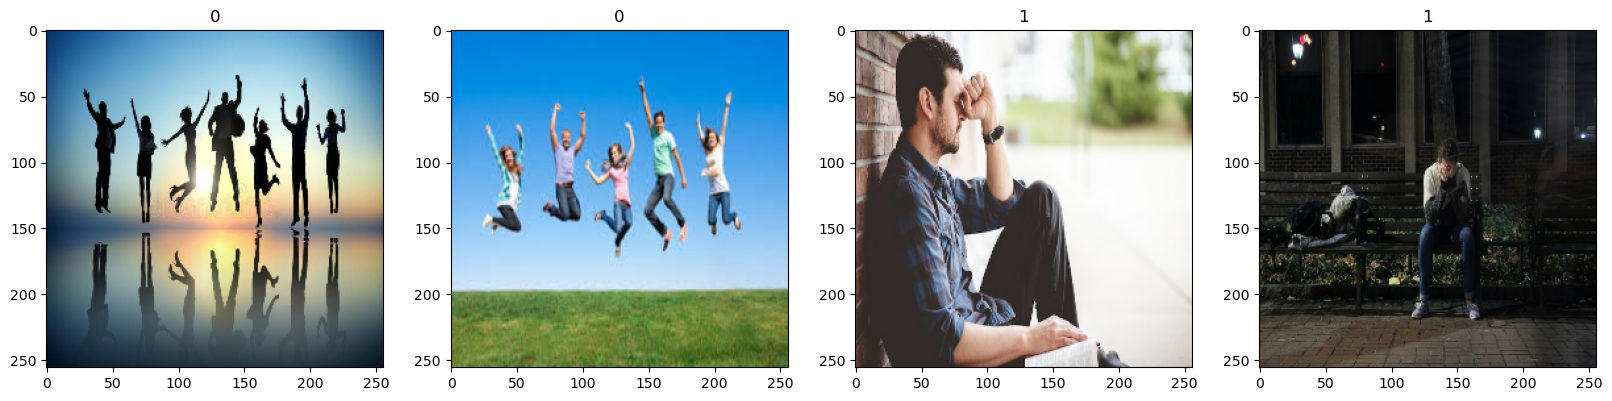

In [224]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))           #using the subplots from matplotlib to be able to plot out 4 images at a time
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## split data

In [198]:
len(data)

7

In [209]:
train_size = int(len(data)*.7)      #used to train our deep learning model
val_size = int(len(data)*.2) + 1    #evaluate our model while training
test_size = int(len(data)*.1) + 1   #not going to be seen until final validation state

In [210]:
train_size + val_size + test_size

7

In [212]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Deep Model

## Build Deep Learning Model

In [254]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [255]:
model = Sequential()

In [256]:
model.add(Conv2D(16, (3, 3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [262]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [263]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 30, 30, 16)       

## train

In [264]:
logdir = 'logs'

In [265]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [266]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])   

Epoch 1/20
4/4 [==============================] - 6s 1s/step - loss: 2.1548 - accuracy: 0.5234 - val_loss: 2.2605 - val_accuracy: 0.3594
Epoch 2/20
4/4 [==============================] - 5s 1s/step - loss: 1.2144 - accuracy: 0.4688 - val_loss: 0.6627 - val_accuracy: 0.5781
Epoch 3/20
4/4 [==============================] - 5s 1s/step - loss: 0.6759 - accuracy: 0.5312 - val_loss: 0.6619 - val_accuracy: 0.5625
Epoch 4/20
4/4 [==============================] - 5s 1s/step - loss: 0.6659 - accuracy: 0.5938 - val_loss: 0.6597 - val_accuracy: 0.5781
Epoch 5/20
4/4 [==============================] - 5s 1s/step - loss: 0.6525 - accuracy: 0.5625 - val_loss: 0.6289 - val_accuracy: 0.5938
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 0.6359 - accuracy: 0.6094 - val_loss: 0.6331 - val_accuracy: 0.5938
Epoch 7/20
4/4 [==============================] - 5s 1s/step - loss: 0.5991 - accuracy: 0.6953 - val_loss: 0.5926 - val_accuracy: 0.6875
Epoch 8/20
4/4 [=========================

In [272]:
hist.history

{'loss': [2.154848575592041,
  1.2144451141357422,
  0.6758509874343872,
  0.6658554077148438,
  0.652549147605896,
  0.635890781879425,
  0.5991253852844238,
  0.590056836605072,
  0.5485573410987854,
  0.5456374883651733,
  0.45581984519958496,
  0.4336453378200531,
  0.39097240567207336,
  0.3834705650806427,
  0.2787823975086212,
  0.24481500685214996,
  0.17338651418685913,
  0.13156796991825104,
  0.1161167323589325,
  0.08719780296087265],
 'accuracy': [0.5234375,
  0.46875,
  0.53125,
  0.59375,
  0.5625,
  0.609375,
  0.6953125,
  0.6875,
  0.75,
  0.7734375,
  0.8046875,
  0.84375,
  0.8359375,
  0.8828125,
  0.9453125,
  0.9140625,
  0.9609375,
  0.96875,
  0.96875,
  0.96875],
 'val_loss': [2.2604925632476807,
  0.6626795530319214,
  0.6618571281433105,
  0.659748911857605,
  0.628858745098114,
  0.6330872178077698,
  0.592564582824707,
  0.6045533418655396,
  0.494210422039032,
  0.4717618227005005,
  0.3417673707008362,
  0.4153141379356384,
  0.38858944177627563,
  0.322

## plot performance

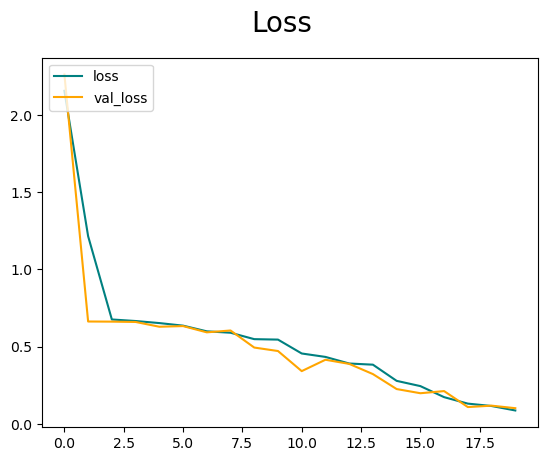

In [274]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

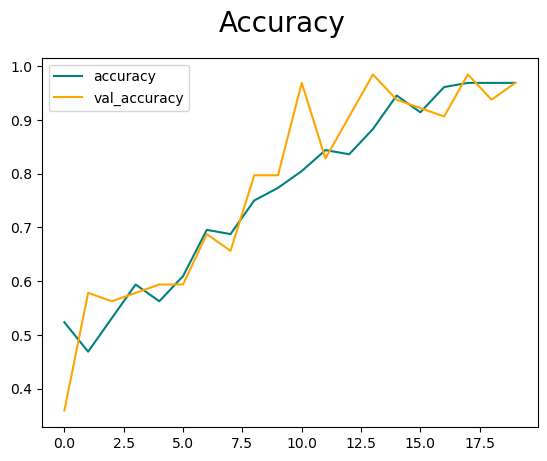

In [277]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performance

## Evaluate

In [278]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [279]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [280]:
len(test)

1

In [282]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 154ms/step


In [283]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')    #checking the performance for each one of the metrics. 1.0 means 100% 

Precision:1.0, Recall:1.0, Accuracy:1.0


## Test

In [284]:
import cv2

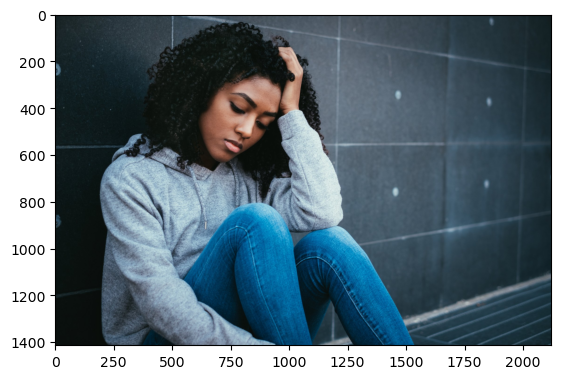

In [323]:
img = cv2.imread('sadperson.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

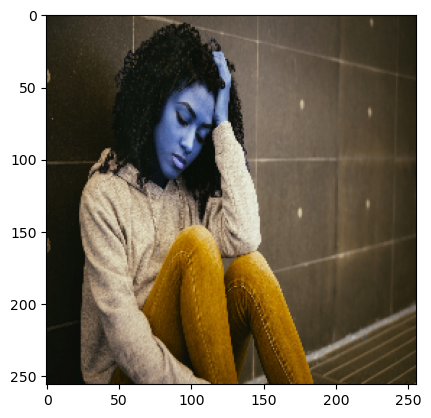

In [328]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [326]:
yhat = model.predict(np.expand_dims(resize/255, 0))   #this model is predicting if the jpg, happyperson.jpg, is either sad or happy

1/1 [==============================] - 0s 21ms/step


In [327]:
yhat    #it's determining that the picture used is happy, thus, making this learning machine accurate

array([[0.05980307]], dtype=float32)

In [316]:
if yhat > 0.5:
    print(f'Predicted the class is sad')
else:
    print(f'predicted the class is happy')

predicted the class is happy


# Save this Model

## Saving the Model

In [317]:
from tensorflow.keras.models import load_model

In [319]:
model.save(os.path.join('models','happysadmodel.h5'))

In [320]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [329]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 20ms/step


In [330]:
if yhat > 0.5:
    print(f'Predicted the class is sad')
else:
    print(f'predicted the class is happy')

Predicted the class is sad
